In [1]:
import numpy as np
import os
import sys
import h5py
import datetime
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from embeddings import Embeddings

Using TensorFlow backend.


EMBEDDING(100,4,1,4) STARTED .....
Loading the embeddings from the cache
EMBEDDING(100,4,1,4) COMPLETED .....


In [2]:
embeddings = Embeddings(100, 4, 1, 4)
tokenized_pos_sentences = embeddings.get_pos_categorical_indexed_sentences()
pos2index, index2pos = embeddings.get_pos_vocabulary()
no_of_unique_tags = len(pos2index)


Loading the embeddings from the cache


In [90]:
window_size = 2

In [3]:
seq_in = []
seq_out = []
# generating dataset
for sentence in tokenized_pos_sentences:
    for i in range(len(sentence)-window_size-1):
        x = sentence[i:i + window_size]
        y = sentence[i + window_size]
        seq_in.append(x)
        seq_out.append(y)
# converting seq_in and seq_out into numpy array
seq_in = np.array(seq_in)
seq_out = np.array(seq_out)
n_samples = len(seq_in)
print ("Number of samples : ", n_samples)

Number of samples :  78805


In [5]:
x_data = seq_in
y_data = seq_out

In [87]:
# Changes to the model to be done here
model = Sequential()
model.add(LSTM(512, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(512))
#model.add(Dropout(0.2))
model.add(Dense(no_of_unique_tags, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 2, 512)            1089536   
_________________________________________________________________
lstm_6 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_3 (Dense)              (None, 19)                9747      
Total params: 3,198,483
Trainable params: 3,198,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_weights_path = "../weights/POS-LSTM-TEST-2-512-512-128-10-0_2-Softmax"
if not os.path.exists(model_weights_path):
    os.makedirs(model_weights_path)
checkpoint_path = model_weights_path + '/pos_weights.{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_acc', verbose=1, save_best_only=False, mode='max')

In [185]:
model.fit(x_data, y_data, epochs=3, batch_size=128, verbose=1, validation_split=0.25)#, callbacks=[checkpoint])

Train on 59103 samples, validate on 19702 samples
Epoch 1/3
59103/59103 [==============================] - 138s - loss: 2.5791 - acc: 0.4321 - val_loss: 2.4613 - val_acc: 0.4619
Epoch 2/3
59103/59103 [==============================] - 148s - loss: 2.5422 - acc: 0.4290 - val_loss: 2.3953 - val_acc: 0.4637
Epoch 3/3
59103/59103 [==============================] - 141s - loss: 2.4943 - acc: 0.4304 - val_loss: 2.3448 - val_acc: 0.4572


In [186]:
test_no = 433
to_predict = seq_in[test_no:test_no+1]

In [188]:
y_ans = model.predict_classes(to_predict)

1/1 [==============================] - 0s


In [190]:
y_ans

array([7])

In [191]:
index2pos[y_ans[0]]

'DET'

In [193]:
len(y_data)

78805

In [194]:
y_ans = model.predict_classes(x_data[101:102])

1/1 [==============================] - 0s


In [195]:
y_ans

array([7])

In [196]:
y_data[101:102]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]])

In [197]:
check_ori = 0
check_pre = 0
counter = 0
test_start = 0
test_end = 15000
list_for_hist_words = []
list_for_hist_index = []
list_for_hist_words_ori = []
list_for_hist_index_ori = []
for i in range(test_start, test_end):
    test_no = i
    to_predict = x_data[test_no:test_no+1]
    y_ans = model.predict(to_predict)
    
    for word, corr_int in pos2index.items():
        if corr_int == np.argmax(y_ans):
            print ("pridicted: ",word, corr_int)
            check_pre = corr_int
            list_for_hist_words.append(word)
            list_for_hist_index.append(corr_int)
        if corr_int == np.argmax(y_data[test_no:test_no+1]):
            print ("original: ",word, corr_int)
            check_ori = corr_int
            list_for_hist_words_ori.append(word)
            list_for_hist_index_ori.append(corr_int)
    if check_ori == check_pre :
        counter += 1
    print('\n')

print("Correct predictions: ",counter, '\nTotal Predictions: ',test_end - test_start)

pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicted:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
orig

pridicted:  ADP 15
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADV 8


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
origin

pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PROPN 9


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  

pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  PUNCT 0


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
o

pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
or

pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  ADV 8


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
orig

original:  ADV 8


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADV 8
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  NOUN 10


pridicted:  NOUN 10
original:  SYM 1


original:  NUM 6
pridicted:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


pridict

pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  NOUN 10


pridicted:  NOUN 10
origi

pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  NOUN 10


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  ADP 15
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PROPN 9


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
o

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  ADV 8
pridicted:  DET 7


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PROPN 9


pridicted:  NOUN 10
original:  PROPN 9


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


pridicted:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


original:  NUM 6
pridicted:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  PROPN 9


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


original:  NUM 6
pridicted:  NOUN 10


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
ori

pridicted:  DET 7
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  CCONJ 13


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN

pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  PART 11


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  PART 11
p

pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  PART 11
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
or

pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  ADP 15
pridicted:  VERB 4


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  ADP 15
pr

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  ADP 15
pridicted:  VERB 4


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  CCONJ 13
pridicted:  VERB 4


pridicted:  NOUN 10
or

pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
orig

pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  ADV 8
prid

pridicted:  ADP 15
original:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  PUNCT 0


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 1

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


original:  PART 11
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  PART 11


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
orig

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
origina

original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  PART 11
pridicted:  VERB 4


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


original:  NUM 6
pridicted:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
or

pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 1

pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


original:  ADV 8
pridicted:  DET 7


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
ori

pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
p

original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original: 

original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADV 8


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  NOUN 10


original:  ADV 8
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
orig

original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


original:  ADV 8
pridicted:  DET 7


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  ADP 15
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10

original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  PART 11


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
o

pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  X 2
pridicted:  VERB 4


original:  X 2
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


original:  ADV 8
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  PRON 18


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 

original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  ADP 15
pridicted:  DET 7


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADV 8
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
origi

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  PROPN 9


pridicted:  NOUN 10
original:  PROPN 9


pridicted:  NOUN 10
original:  PROPN 9


pridicted:  NOUN 10
original:  PART 11


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  CCONJ 13


original:  NUM 6
pridicted:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 1

original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  ADV 8


original:  NOUN 10
p

pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADV 8
pridicted:  DET 7


original:  ADV 8
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  DET 7
orig

original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  PART 11
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
ori

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
origina

pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  PUNCT 0


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  CCONJ 13


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  PUNCT 0


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  PART 11


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


original:  NOUN

pridicted:  NOUN 10
original:  PART 11


pridicted:  NOUN 10
original:  NOUN 10


original:  ADV 8
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


original:  PART 11
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
orig

pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  PRON 18


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  PART 11


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
origina

pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
origina

pridicted:  NOUN 10
original:  PART 11


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
orig

original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


original:  ADJ 3
pridicte

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  DET 7
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridic

original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15

pridicted:  DET 7
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
orig

pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADV 8
prid

pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  PRON 18
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15

pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicted:  ADP 15


pridicted:  NOUN 10
original:  ADV 8


original:  ADV 8
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicte

pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


original:  PRON 18
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
prid

pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
or

pridicted:  NOUN 10
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADV 8


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
origin

pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  DET 7
original:  VERB 4


original:  NOUN 10
pridicted:  ADP 15


pridicted:  NOUN 10
original:  ADV 8


pridicted:  VERB 4
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
o

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  ADV 8


pridicted:  VERB 4
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
orig

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  ADV 8
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
orig

pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  ADP 15
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


original:  ADJ 3
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
origina

pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  PROPN 9


pridicted:  NOUN 10
original:  CCONJ 13


pridicted:  NOUN 10
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  PROPN 9
pridicted:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


original:  NUM 6
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  D

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


original:  ADP 15
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  VERB 4


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pr

pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  ADP 15
pridicted:  DET 7


pridicted:  NOUN 10
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  CCONJ 13


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 1

pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  CCONJ 13
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  VERB 4


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PUNCT 0


pridicted:  N

pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  CCONJ 13


pridicted:  NOUN 10
original:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  X 2
pridicted:  DET 7


pridicted:  NOUN 10
original:  PART 11


original:  NOUN 10
pridicted:  VERB 4


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
or

pridicted:  ADP 15
original:  ADV 8


original:  ADV 8
pridicted:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  PART 11


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADJ 3


pridicted:  NOUN 10
original:  ADP 15


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  VERB 4


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  VERB 4


pridicted:  NOUN 10
original:  VERB 4


pridicted:  ADP 15
origina

pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  CCONJ 13


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADV 8


pridicted:  NOUN 10
orig

pridicted:  NOUN 10
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


original:  DET 7
pridicted:  VERB 4


pridicted:  NOUN 10
original:  ADJ 3


pridicted:  DET 7
original:  PRON 18


pridicted:  VERB 4
original:  VERB 4


pridicted:  DET 7
original:  ADJ 3


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADP 15


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  PART 11


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:

pridicted:  ADP 15
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  NOUN 10
original:  ADP 15


original:  NOUN 10
pridicted:  DET 7


pridicted:  NOUN 10
original:  ADV 8


original:  ADV 8
pridicted:  VERB 4


pridicted:  DET 7
original:  VERB 4


original:  ADV 8
pridicted:  DET 7


pridicted:  VERB 4
original:  VERB 4


original:  NOUN 10
pridicted:  DET 7


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


pridicted:  ADP 15
original:  ADV 8


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


pridicted:  DET 7
original:  DET 7


pridicted:  NOUN 10
original:  NOUN 10


original:  NOUN 10
pridicted:  ADP 15


original:  ADP 15
pridicted:  VERB 4


original:  NOUN 10
pridicted:  DET 7


original:  NOUN 10
pridi

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
pos_vocab = [v for (k,v) in index2pos.items()]

In [200]:
pos_vocab

['PUNCT',
 'SYM',
 'X',
 'ADJ',
 'VERB',
 'CONJ',
 'NUM',
 'DET',
 'ADV',
 'PROPN',
 'NOUN',
 'PART',
 'INTJ',
 'CCONJ',
 'SPACE',
 'ADP',
 'SCONJ',
 'AUX',
 'PRON']

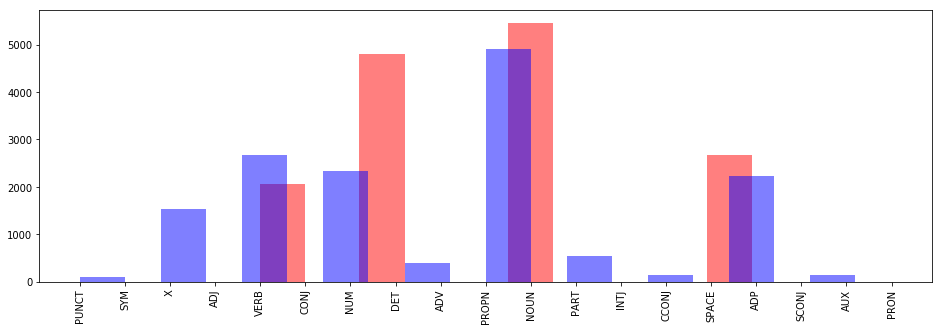

In [206]:
plt.figure(figsize=(16,5))
plt.hist(list_for_hist_index, width=1, color='r', alpha=0.5)
plt.hist(list_for_hist_index_ori, width=1, color='b', alpha=0.5)
plt.xticks(range(len(pos_vocab)),pos_vocab, rotation='vertical')
plt.show()

In [164]:
index2pos

{0: 'PUNCT',
 1: 'SYM',
 2: 'X',
 3: 'ADJ',
 4: 'VERB',
 5: 'CONJ',
 6: 'NUM',
 7: 'DET',
 8: 'ADV',
 9: 'PROPN',
 10: 'NOUN',
 11: 'PART',
 12: 'INTJ',
 13: 'CCONJ',
 14: 'SPACE',
 15: 'ADP',
 16: 'SCONJ',
 17: 'AUX',
 18: 'PRON'}

In [109]:
list_x = []
list_y = []
data_all = []
for i in range(0,1500):
    list_x.append((index2pos[np.argmax(x_data[i][0])], index2pos[np.argmax(x_data[i][1])]))
    list_y.append(index2pos[np.argmax(y_data[i])])
    data_all.append((str(list_x[i]),list_y[i]))

In [110]:
#list_x

In [111]:
#list_y

In [112]:
#data_all

In [113]:
from nltk import ConditionalFreqDist as cfd
from nltk.collocations import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)
import pandas as pd

In [114]:
cfd_res = cfd(data_all)

In [115]:
#cfd_res

In [116]:
df = pd.DataFrame(cfd_res).fillna(0)
mat = df.as_matrix()
#mat

In [117]:
trace = go.Heatmap(z = mat,
                   x=df.columns,
                   y=list(df.index))
data=[trace]
plot.iplot(data, filename='labelled-heatmap')